## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [3]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


## 2.1 No scaled y dataset evaluation

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, cv=cv,
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,), (20,20)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=False))

{'activation': 'identity', 'hidden_layer_sizes': (20,), 'solver': 'adam'}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, mlp, cv=cv, scaling=False)

## 2.2 Scaled y dataset evaluation

In [7]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, cv=cv, 
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,), (20,20)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=True))

{'activation': 'identity', 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, mlp, cv=cv, scaling=True)

## 3.0 Model testing settings

In [4]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

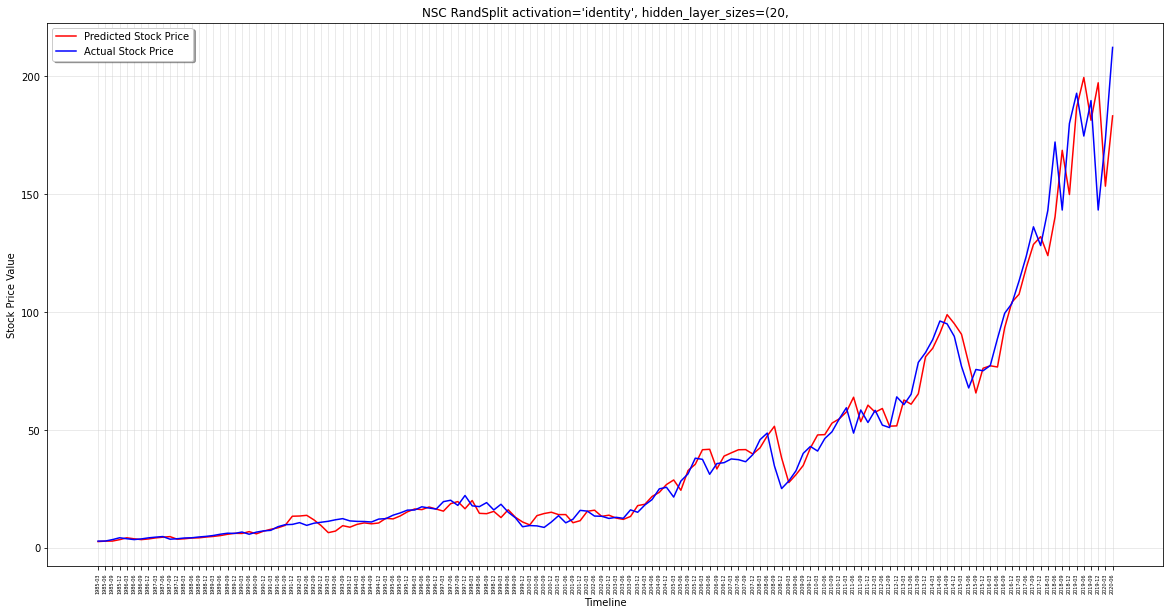

NSC MODEL RESULTS
 RMSE
 	Test: 5.823741778964781
 MAPE
 	Test: 0.12496528599225087
 MAE
 	Test: 3.5894398107889596
 R2 Score Adj
 	Test: 0.9811867269779834



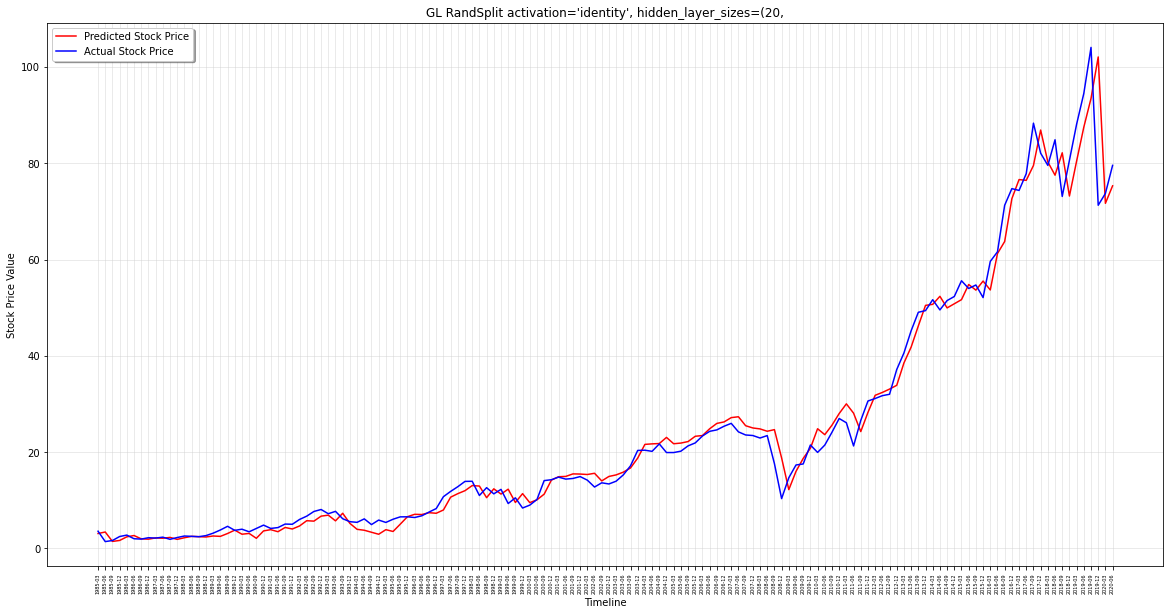

GL MODEL RESULTS
 RMSE
 	Test: 2.2911937910184204
 MAPE
 	Test: 0.11164361435270395
 MAE
 	Test: 1.5660635955078073
 R2 Score Adj
 	Test: 0.9901192649239796



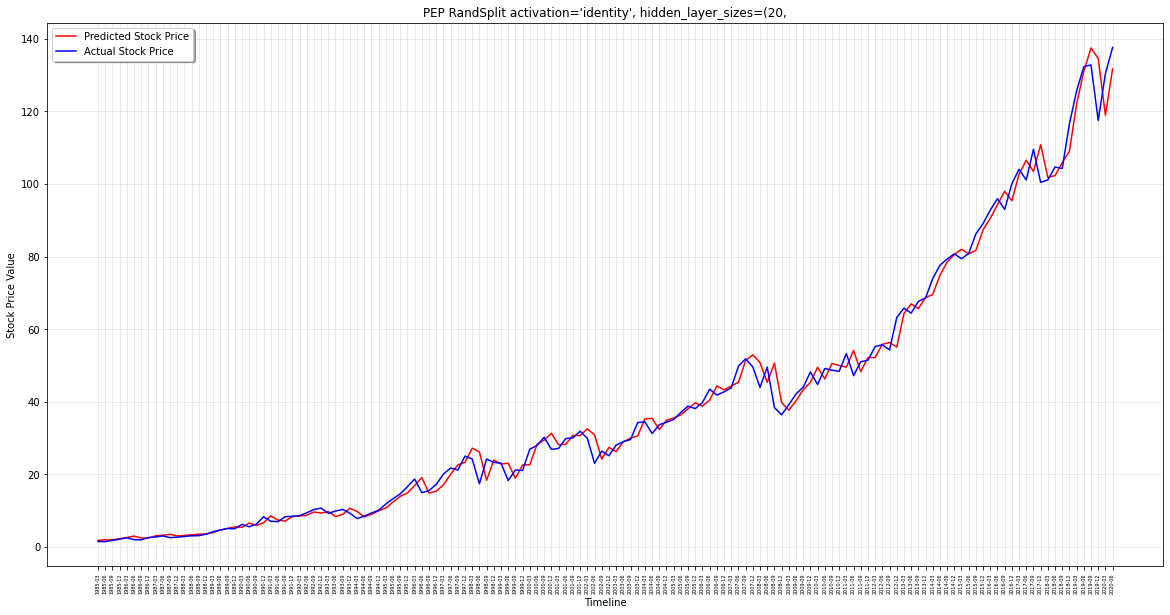

PEP MODEL RESULTS
 RMSE
 	Test: 2.4267207471643752
 MAPE
 	Test: 0.08253480493513123
 MAE
 	Test: 1.6130882441360386
 R2 Score Adj
 	Test: 0.9942032738152191



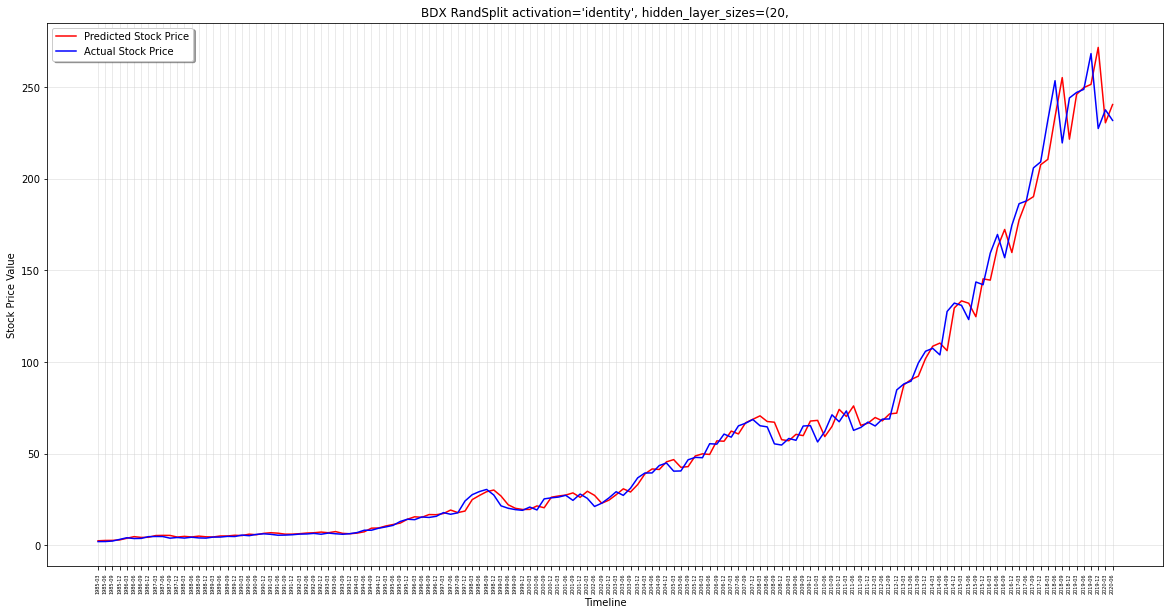

BDX MODEL RESULTS
 RMSE
 	Test: 6.180053324085424
 MAPE
 	Test: 0.0836284944020131
 MAE
 	Test: 3.1466934565054046
 R2 Score Adj
 	Test: 0.990103835892518



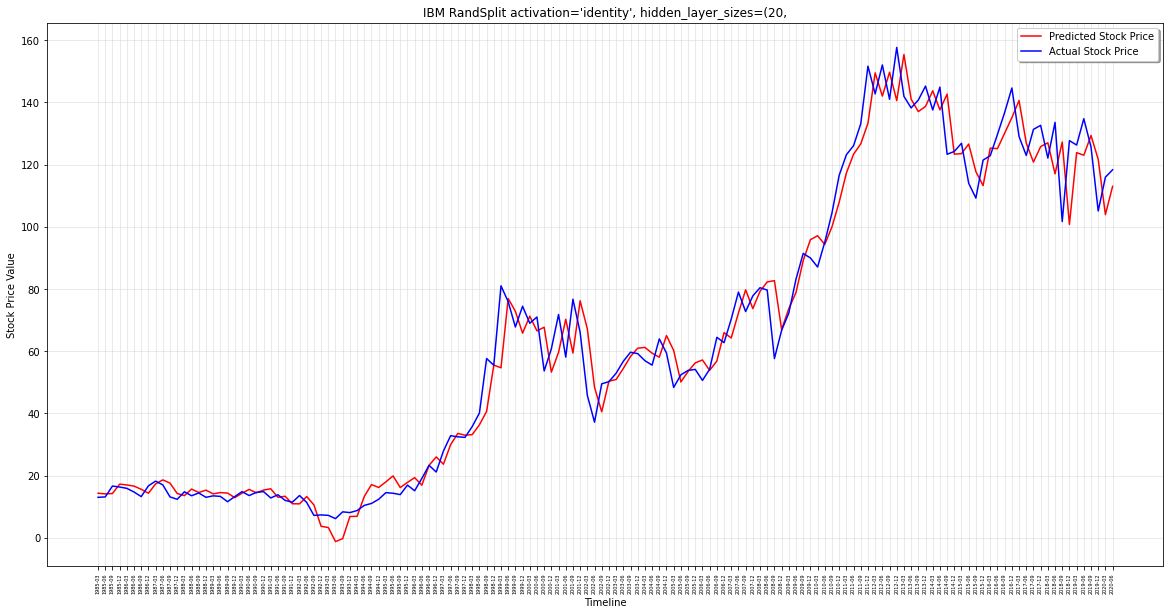

IBM MODEL RESULTS
 RMSE
 	Test: 8.926311055269029
 MAPE
 	Test: 0.1523410864710671
 MAE
 	Test: 6.10716992802055
 R2 Score Adj
 	Test: 0.9698787014458563



In [5]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'} #con error_score=1
#Params={'activation': 'identity', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (20,), 'solver': 'adam'}
Params={'activation': 'identity', 'hidden_layer_sizes': (20,), 'solver': 'adam'}
mlp = MLPRegressor(random_state=2021, max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

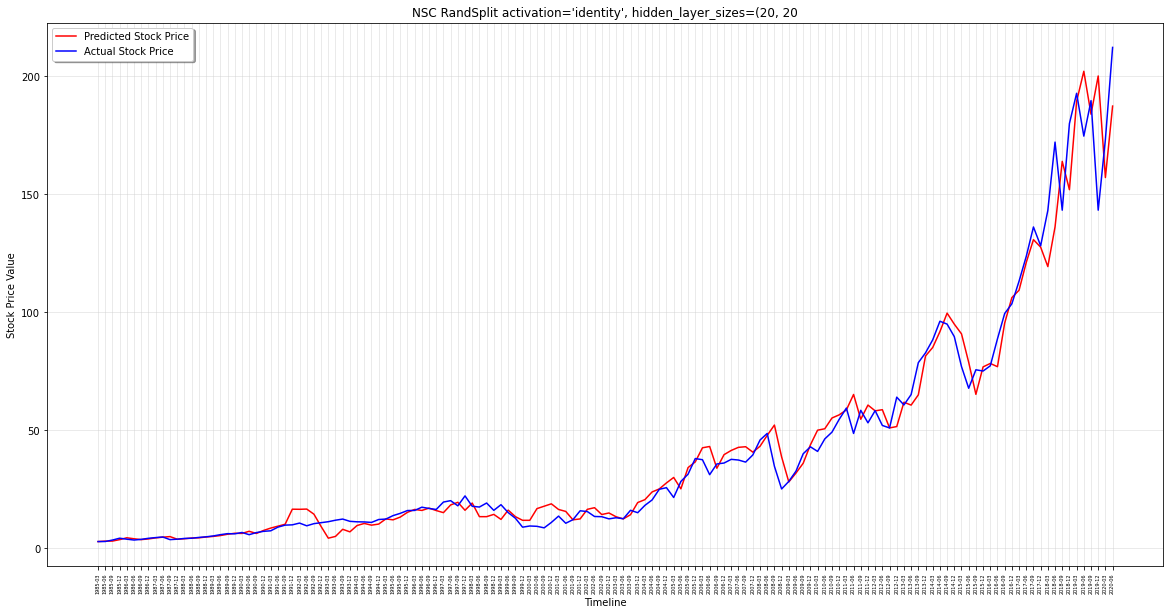

NSC MODEL RESULTS
 RMSE
 	Test: 6.74937885748851
 MAPE
 	Test: 0.1656398896940326
 MAE
 	Test: 4.284428729035766
 R2 Score Adj
 	Test: 0.9747310177238508



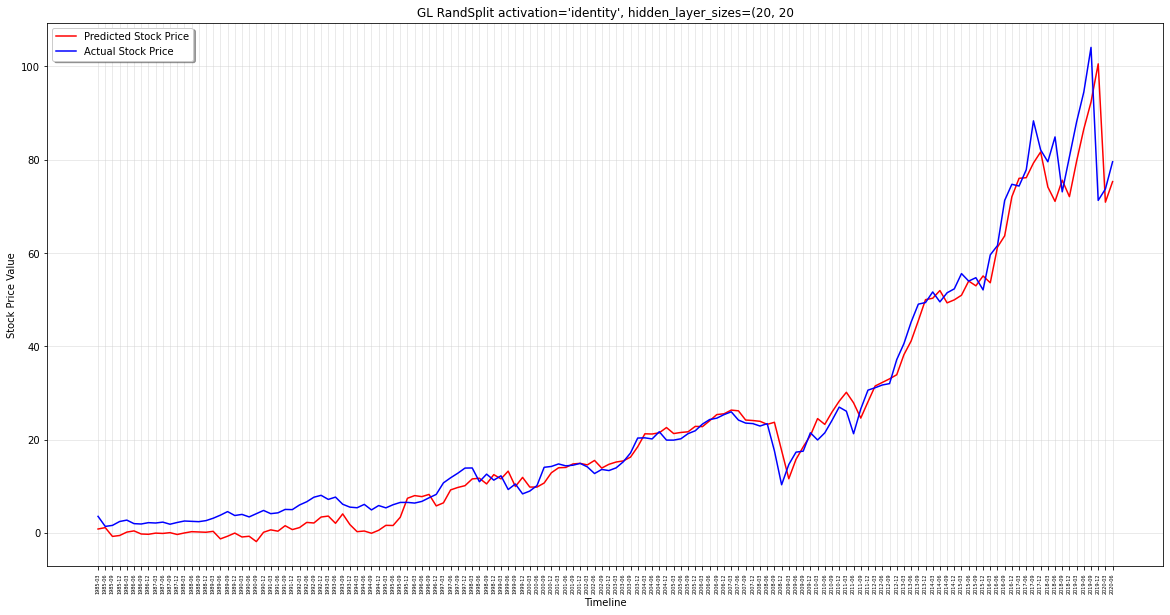

GL MODEL RESULTS
 RMSE
 	Test: 3.5799252954109417
 MAPE
 	Test: 0.45930730859856095
 MAE
 	Test: 3.0944295789543173
 R2 Score Adj
 	Test: 0.9758779876372122



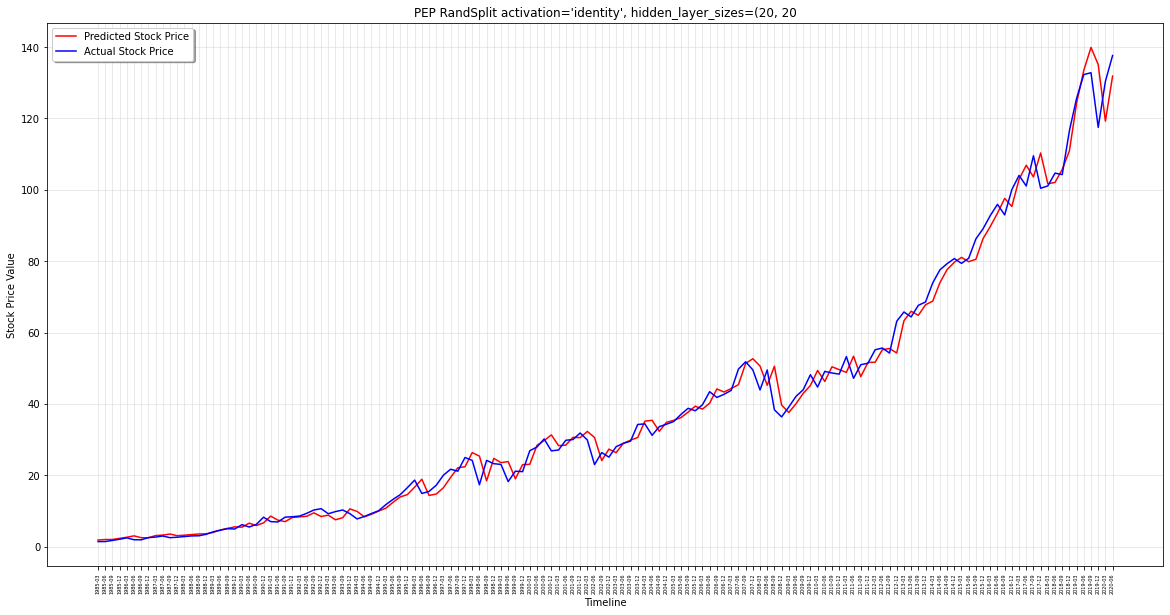

PEP MODEL RESULTS
 RMSE
 	Test: 2.478365732230528
 MAPE
 	Test: 0.0956761843695768
 MAE
 	Test: 1.6345463795445816
 R2 Score Adj
 	Test: 0.9939539188588655



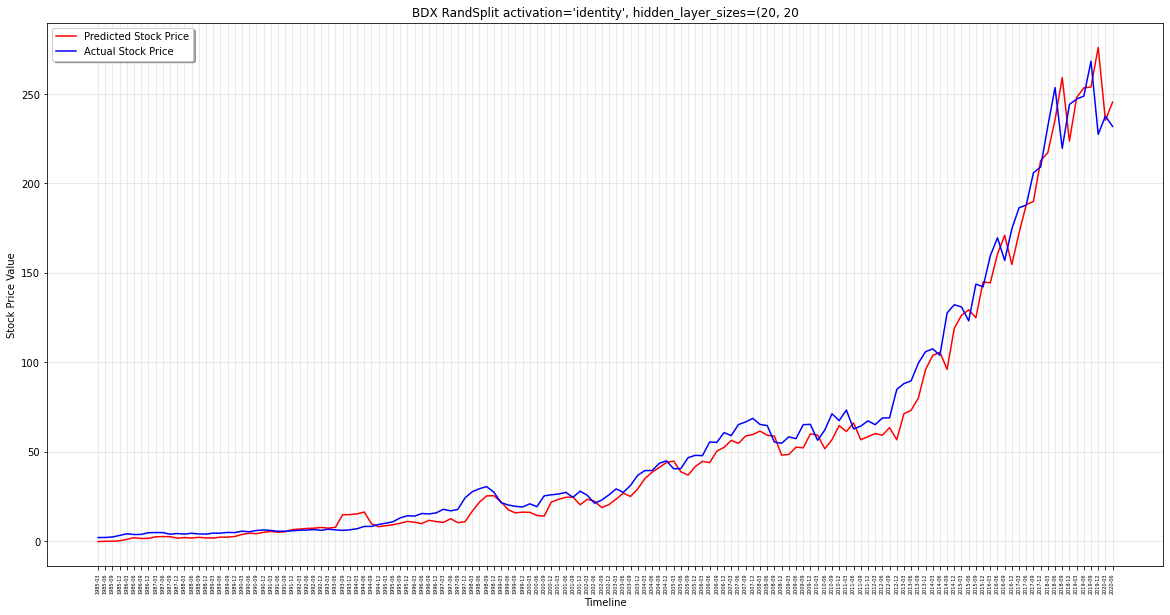

BDX MODEL RESULTS
 RMSE
 	Test: 9.814442072551524
 MAPE
 	Test: 0.3640732426781347
 MAE
 	Test: 6.713580357310849
 R2 Score Adj
 	Test: 0.9750417761326107



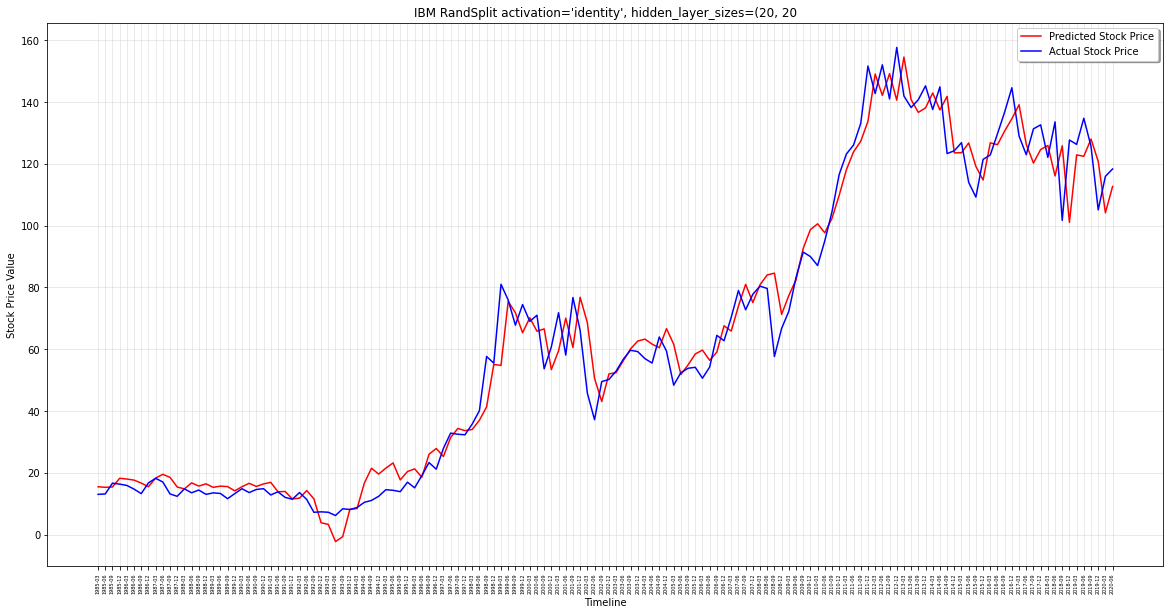

IBM MODEL RESULTS
 RMSE
 	Test: 9.1784086401421
 MAPE
 	Test: 0.16481516414855268
 MAE
 	Test: 6.484520520369847
 R2 Score Adj
 	Test: 0.9681533000388948



In [6]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'adam'} #1
#Params={'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'adam'} # error_score=1
Params={'activation': 'identity', 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}
mlp = MLPRegressor(random_state=2021, max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=True)

In [6]:
print(type((50,)))

<class 'tuple'>
